Mayo 2021
# Algoritmo Ford - Fulkerson: Flujo Máximo

## 1. Algoritmo Ford - Fulkerson
cómo funciona, aplicaciones en la vida real, (ana)

### Flujo máximo

Los problemas de flujo máximo implican encontrar un flujo factible a través de una red con una sola fuente y un solo sumidero que sea máximo.

Veamos la siguiente gráfica:

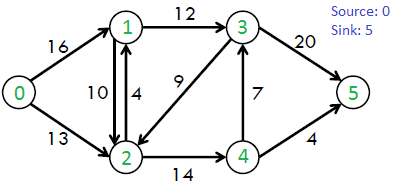

In [4]:
from IPython.display import Image
Image(filename='img/ford_fulkerson1.png')

Cada arco está etiquetado por una capacidad la cual representa el flujo máximo que puede pasar del nodo $i$ al nodo $j$. El objetivo es encontrar la capacidad máxima de flujo que pasa del nodo origen (fuente) al nodo destino (sumidero). El flujo máximo en esta red es 23.


A continuación se muestran diferentes enfoques para resolver este problema de flujo máximo:

**1. Aproximación del Algoritmo Naive Greedy (puede que no produzca un resultado óptimo o correcto)**

Esta aproximación del problema del flujo máximo comienza con el flujo total cero y produce flujos con un valor cada vez mayor. La forma natural de pasar de uno a otro es enviar más flujo en algún camino de $s$ a $t$

Cómo funciona el enfoque Greedy para encontrar el flujo máximo:


        E número de arista
        f(e) flujo que se encuentra en la arista e.
        C(e) capacidad de la arista e.


                1) Inicializa : max_flow = 0  
                f(e) = 0 para cada arista e en E.
            
                2) Encontrar un camino de s a t (mientras exista).   
                   a) El camino existe si f(e) < C(e) para cada arista e en el camino. 
                   b) Si no se encuentra un camino, return max_flow.
                   c) Else encontrar el valor mínimo para la ruta P
        
      // Nuestro flujo está limitado por el flujo que queda
    
      (i) flow = min(C(e)- f(e)) Para el camino P.
             max_flow += flow
      (ii) Para cada arista e del camino, incrementar el flujo
             f(e) += flow

                3) Return max_flow 


Nótese que la búsqueda de ruta solo necesita determinar si hay una ruta $s-t$ en el subgrafo de los bordes $e$ con $f(e) <C(e)$ por lo que no es costoso computacionalmente.

Veamos elsiguiente ejemplo:

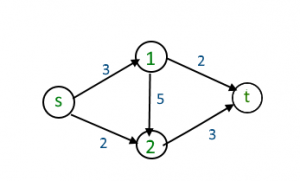

In [7]:
Image(filename='img/ford_fulkerson2.png')

Existe un camino de s a t $s \rightarrow 1  \rightarrow 2  \rightarrow t$ con un flujo máximo de 3 unidades (la ruta se muestra en color azul)

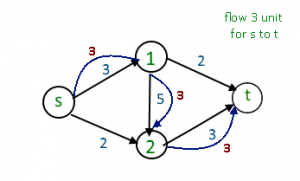

In [11]:
Image(filename='img/ford_fulkerson4.png')

La capacidad restante está representada por los números de color verde.

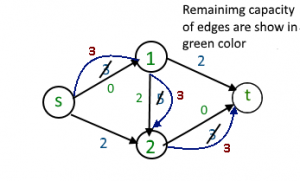

In [12]:
Image(filename='img/ford_fulkerson5.png')

Para el gráfico anterior notamos que no existe un camino de $s \rightarrow t$, por lo que el flujo máximo es de 3 unidades. Pero el flujo máximo que sale del nodo origen es de 5 unidades, así como el flujo máximo que llega al nodo destino.

Para superar este problema utilizamos el gráfico residual.

**2. Gráfico residual** 

La idea es extender el algoritmo mencionado anteriormente al permitir operaciones de "deshacer". Por ejemplo, desde el punto donde este algoritmo se atasca en la imagen de arriba, nos gustaría enrutar dos unidades más de flujo a lo largo del borde $(s, 2)$, luego hacia atrás a lo largo del borde $(1, 2)$, deshaciendo 2 de las 3 unidades enrutamos la iteración anterior, y finalmente a lo largo del borde $(1, t)$


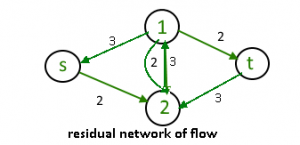

In [14]:
Image(filename='img/ford_fulkerson7.png')

Consideremos: 
* Arco inverso: $f (e)$
* Arco: $C (e) - f (e)$

Necesitamos una forma de especificar formalmente las operaciones de "deshacer" permitidas. Esto motiva la siguiente definición simple pero importante, de una red residual:

Dado un grafo $G$ y un flujo $f$ en él, formamos una nueva red de flujo $G_f$ que tiene el mismo conjunto de vértices de $G$ y por cada arco de $G$ se crean dos nuevos arcos.

Por ejemplo, el arco $e = (1,2 )$ de $G$ lleva el flujo $f (e)$ y tiene capacidad $C (e)$ (para la imagen de arriba) genera un arco  de $G_f$ con capacidad $C (e) -f (e)$ (la capacidad restante) y un arco inverso $(2,1)$ de $G_f$ con capacidad $f (e)$ (la cantidad de flujo previamente encaminado que se puede deshacer). Ahora se tiene un camino de $s$ a $t$ con capacidad $f (e) <C (e)$ para todos los arcos.




La idea de utilizar gráficos residuales para flujo máximo se utiliza en el algoritmo de Ford-Fulkerson.


### Algoritmo Ford-Fulkerson

El algoritmo de Ford-Fulkerson propone buscar caminos en los que se pueda aumentar el flujo, hasta que se alcance el flujo máximo. Su nombre viene dado por sus creadores, *L. R. Ford, Jr*. y *D. R. Fulkerson*

Sea $G(V,E)$ un grafo, con $V$ vértices, $E$ aristas y donde por cada arista $(u,v)$, tenemos una capacidad $c(u,v)$ y un flujo $f(u,v)$. Se busca maximizar el valor del flujo desde una fuente $s$ hasta un sumidero $t$.

El método inicia con $f(u,v)=0$ para toda $(u,v) \in V)$. En cada iteración, se incrementa el flujo en $G$ mediante el resultado de una búsqueda de un camino de aumento en una red.

El flujo a aumentar se debe considerar legal, es decir:

    El flujo de para toda arista $(u,v)$ no debe ser mayor que la capacidad de dicha arista. El flujo que sale de la fuente $s$ debe ser igual al que llega al sumidero $t$.

Nota: En una red con fuente $s$ y sumidero $t$ único el valor máximo que puede tomar un flujo variable es igual a la capacidad mínima que puede tomar un corte.

**Red residual**

Como se mencionó anteriormente, definimos una red residual $𝐺_f(V,E)$ como la red donde la capacidad de cada una de las aristas se define como $cf(u,v)= c(u,v)−f(u,v)$ , donde $c(u,v)$ es la capacidad de la arista y el flujo $f(u,v)$ es el flujo de la arista $(u,v)$ en el camino de aumento seleccionado.

Intuitivamente, dado el grafo $G$ y un camino de aumento $c_F$, la red residual $G_f$ consiste en el grafo que representa el como cambia la capacidad de cada una de las aristas con respecto al flujo del camino de aumento $c_F$ en el grafo $G$.

**Caminos de aumento**

Un camino de aumento es un camino dirigido de la fuente $s$ al sumidero $t$ en $G_f$, donde la capacidad del camino de aumento es el mínimo de las capacidades de sus aristas.

**Complejidad**

Al agregar un camino de aumento al flujo ya establecido en el gráfico, se alcanzará el flujo máximo cuando no se puedan encontrar más caminos de aumento de flujo en el gráfico. Sin embargo, no hay certeza de que esta situación se llegue alguna vez, por lo que lo mejor que se puede garantizar es que la respuesta será correcta si el algoritmo termina. En el caso de que el algoritmo se ejecute indefinidamente, es posible que el flujo ni siquiera converja hacia el flujo máximo. Sin embargo, esta situación solo ocurre con valores de flujo irracionales. 

Cuando las capacidades son números enteros, el tiempo de ejecución de Ford-Fulkerson está limitado por $O(E_f)$, donde $E$ es el número de aristas en el gráfico y $f$ es el flujo máximo en el gráfico. Esto se debe a que cada ruta de aumento se puede encontrar en el tiempo $O(E)$ y aumenta el flujo en una cantidad entera de al menos $1$, con el límite superior $f$.

**Pseudocódigo**

      Ford-Fulkerson(G,s,t) {
      Gf = Crear_grafo_residual(G);
      for (cada arista (u,v) de E) {
          f[u,v]= 0;
      }
      while (exista un camino p desde s a t en la red residual Gf) {
          cf(p) = min{cf(u,v): (u,v) está sobre p};
          for (cada arista (u,v) en p) {
              f[u,v]= f[u,v] + cf(p);
              f[v,u]= f[v,u] - cf(p);
          }
          Actualizar_grafo_residual(Gf);
      }

    }


## 2. Desarrollo de ffmaxflow

código original, documentación, (león)


## 2. Desarrollo de ffmaxflow
código original, documentación, (león)

## 3. Reimplementación de ffmaxflow
reimplementación 1, reimplementación 2, (dira)

## 4. Aplicación a datos reales
resultado correcto, tiempo original vs C, (iván)

## 5. Conclusiones

Existe el teorema de **cortadura mínima** el cual consiste en generar una partición de los vértices de una red de flujo en dos conjuntos, de modo que un conjunto incluye la fuente $s$ y el otro incluye el sumidero $t$. Por lo tanto, el flujo máximo está limitado por la capacidad mínima de corte.

El corte se define como la suma de las capacidades de los arcos desde el lado de la fuente hasta el lado del sumidero. El flujo máximo tiene que ser igual a la capacidad del corte mínimo.

Se puede encontrar un corte mínimo después de realizar un cálculo de flujo máximo utilizando el método Ford Fulkerson. Un posible corte mínimo es el siguiente: el conjunto de todos los vértices que se pueden alcanzar desde s en el gráfico residual (utilizando aristas con capacidad residual positiva), y el conjunto de todos los demás vértices.

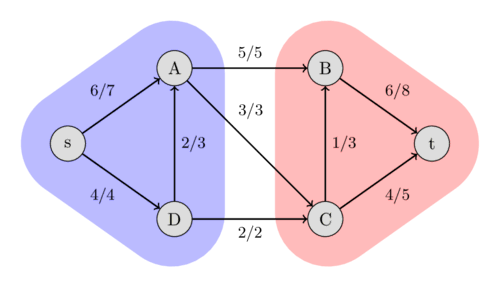

In [17]:
Image(filename='img/ford_fulkerson8.png')

## 6. Referecias

[Max Flow Problem Introduction](https://www.geeksforgeeks.org/max-flow-problem-introduction/)

[Documentación de nuestro paquete](https://optimizacion-2-2021-1-gh-classroom.github.io/practica-2-segunda-parte-diramtz/maxflow.html)

[Cortadura mínima](https://en.wikipedia.org/wiki/Max-flow_min-cut_theorem)